# Iris Classification
Iris classification is a typical machine learning classification project where we use a dataset to train the module to identify/recognise the target. There are three species of Iris flower. When a new flower is given, we need to predict it belongs to which type.


In [1]:
import sklearn
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
!pip install scikit-learn==1.3.0


# Loading the Dataset

In [3]:
# load the csv data
df = pd.read_csv('IRIS.csv')
df.head()

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [4]:
#deleting id column
df = df.drop(columns = ['ID'])
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
#display basic statistics of data
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#disolay no. of samples on each class
df['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

# Preprocessing dataset

In [8]:
#check null values
df.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

# Data analysis

<Axes: >

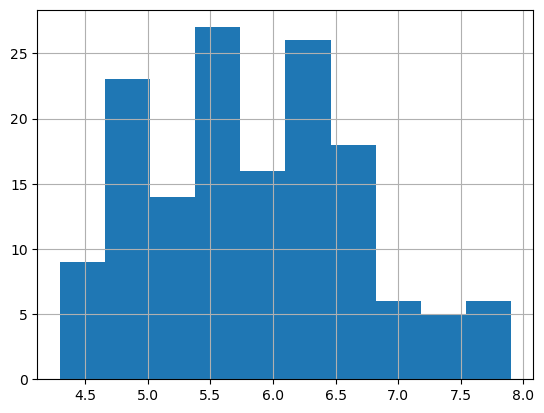

In [9]:
df['Sepal.Length'].hist()

<Axes: >

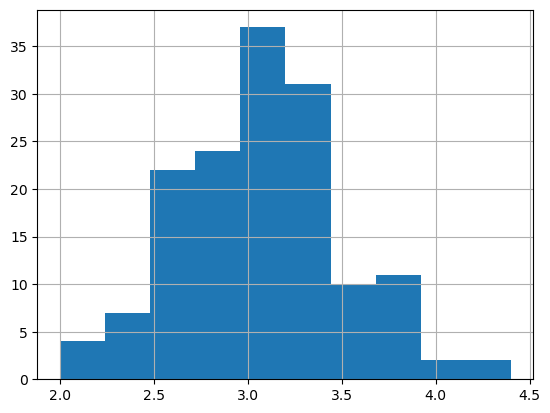

In [10]:
df['Sepal.Width'].hist()

<Axes: >

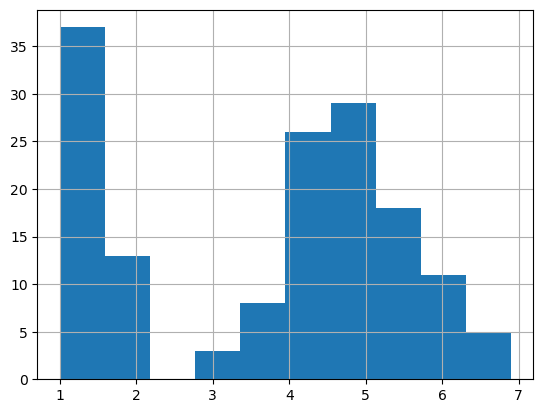

In [11]:
df['Petal.Length'].hist()

<Axes: >

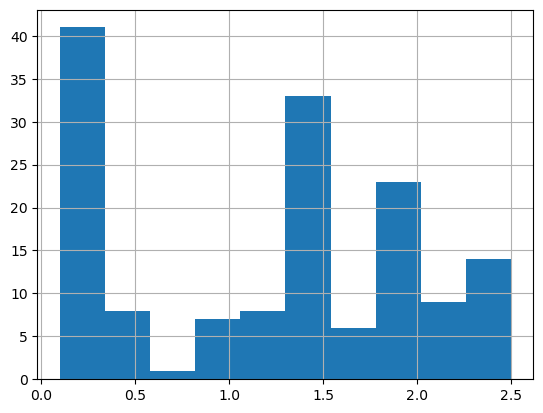

In [12]:
df['Petal.Width'].hist()

In [13]:
# create list of colors and class labels
colors = ['red', 'orange', 'blue']
species = ['virginica', 'versicolor', 'setosa']


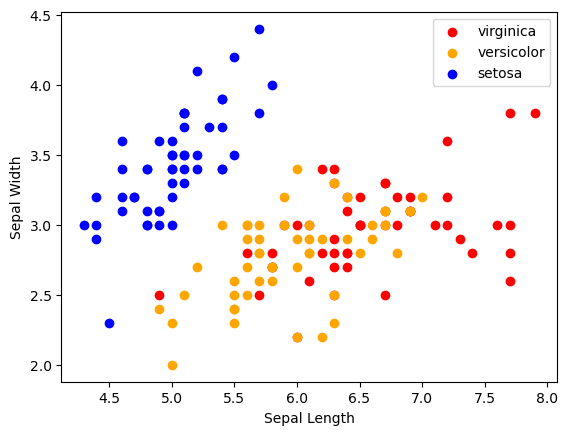

In [14]:
for i in range(3):
    # filter data on each class
    x = df[df['Species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['Sepal.Length'], x['Sepal.Width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

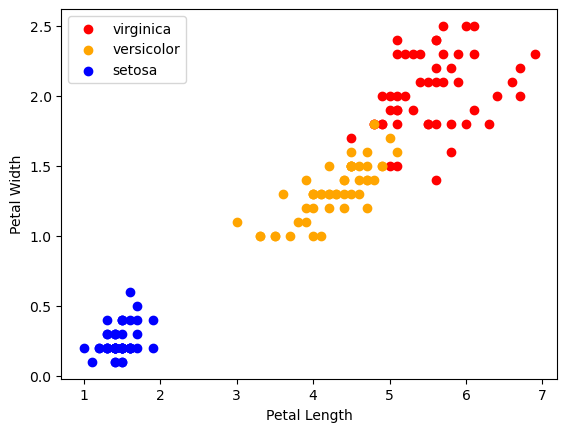

In [15]:
for i in range(3):
    # filter data on each class
    x = df[df['Species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['Petal.Length'], x['Petal.Width'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

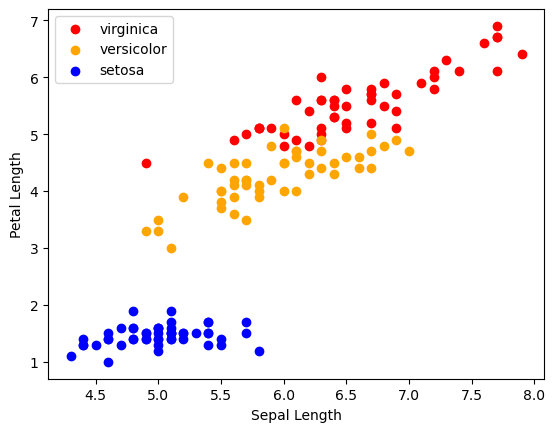

In [16]:
for i in range(3):
    # filter data on each class
    x = df[df['Species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['Sepal.Length'], x['Petal.Length'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

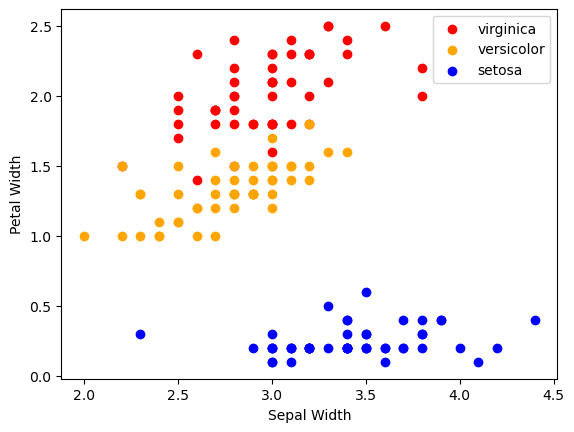

In [17]:
for i in range(3):
    # filter data on each class
    x = df[df['Species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['Sepal.Width'], x['Petal.Width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

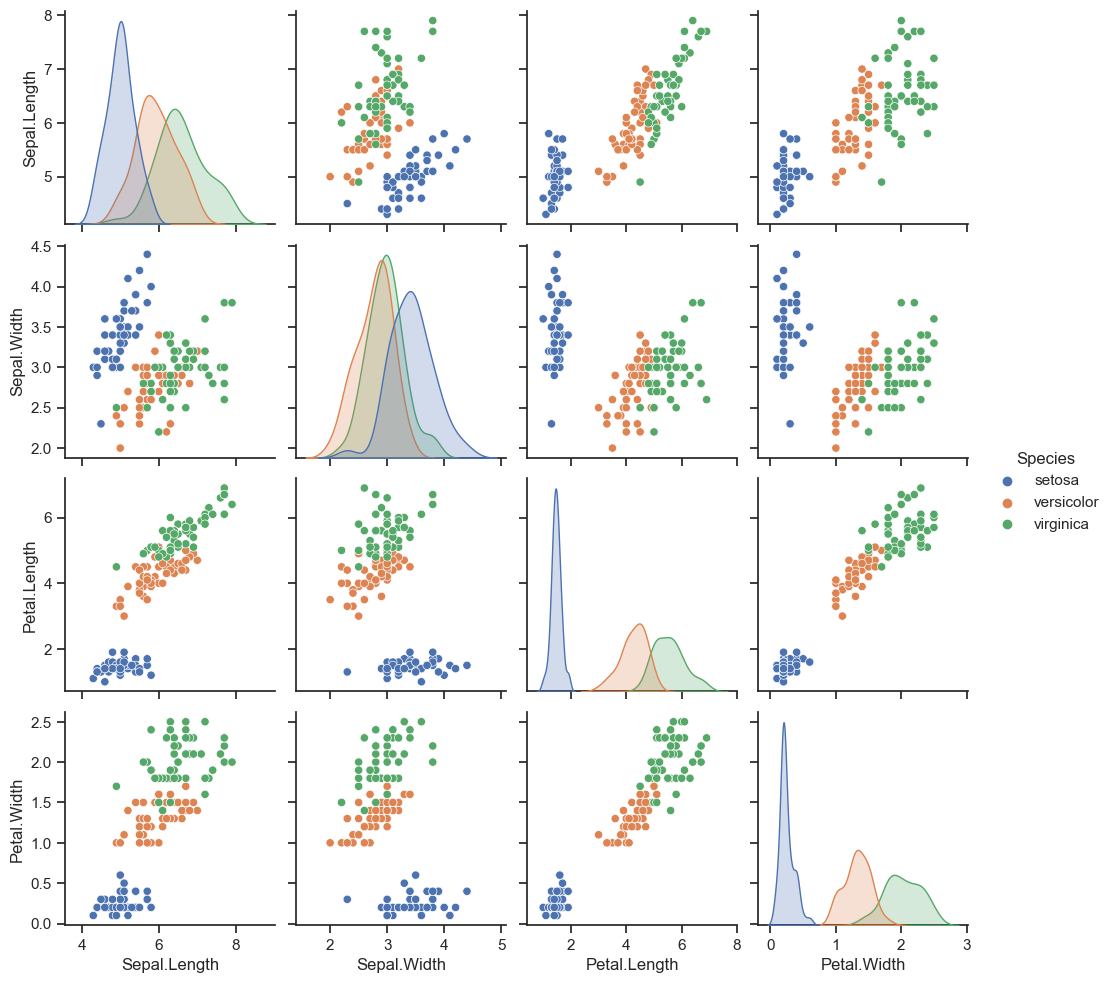

In [18]:
#Multivariate scatter plot
#Multivariate scatter plot helps us to visualize the pair-wise relationship in our dataset
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(df, hue="Species")


# Correlation Matrix

              Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Sepal.Length      1.000000    -0.117570      0.871754     0.817941
Sepal.Width      -0.117570     1.000000     -0.428440    -0.366126
Petal.Length      0.871754    -0.428440      1.000000     0.962865
Petal.Width       0.817941    -0.366126      0.962865     1.000000


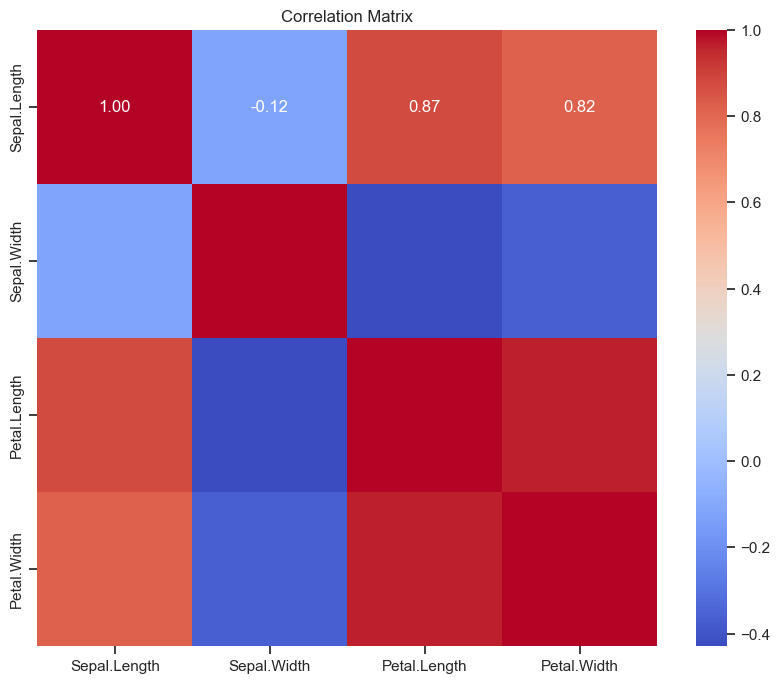

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# Model Training and Testing

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

# input data
X = df.drop(columns=['Species'])
# output data
Y = df['Species']
# split the data for train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [21]:
# Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)
print("Logistic Regression Accuracy: ", model.score(x_test, y_test) * 100)

Logistic Regression Accuracy:  86.66666666666667


In [22]:
# model training
model.fit(x_train.values, y_train.values)

LogisticRegression()

In [23]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  86.66666666666667


In [24]:

# K-nearest neighbors
model = KNeighborsClassifier()
model.fit(x_train.values, y_train.values)
print("K-nearest neighbors Accuracy: ", model.score(x_test, y_test) * 100)

K-nearest neighbors Accuracy:  93.33333333333333


In [25]:
model.fit(x_train.values, y_train.values)

KNeighborsClassifier()

In [26]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333


In [27]:

# Decision Tree
model = DecisionTreeClassifier()
model.fit(x_train.values, y_train.values)
print("Decision Tree Accuracy: ", model.score(x_test, y_test) * 100)

Decision Tree Accuracy:  88.88888888888889


In [28]:
model.fit(x_train.values, y_train.values)

DecisionTreeClassifier()

In [29]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  88.88888888888889


In [30]:
# save the model
import pickle
filename = 'saved_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [31]:
import pickle

In [32]:

# Save the updated model
filename = 'saved_model.sav'
try:
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print("Model saved successfully.")
except Exception as e:
    print(f"Error saving the model: {e}")

Model saved successfully.


In [33]:
load_model = pickle.load(open(filename, 'rb'))

In [34]:
load_model.predict([[6.0, 2.2, 4.0, 1.0]])

array(['versicolor'], dtype=object)

In [35]:
import sklearn
print(sklearn.__version__)


1.3.0


In [36]:
x_test.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
4,5.0,3.6,1.4,0.2
106,4.9,2.5,4.5,1.7
115,6.4,3.2,5.3,2.3
84,5.4,3.0,4.5,1.5
17,5.1,3.5,1.4,0.3


In [37]:

load_model.predict([[4,3,1,5]])

array(['setosa'], dtype=object)

In [38]:
import joblib

# Save the updated model using joblib
filename_joblib = 'saved_model1.joblib'
try:
    joblib.dump(model, filename_joblib)
    print("Model saved successfully using joblib.")
except Exception as e:
    print(f"Error saving the model using joblib: {e}")


Model saved successfully using joblib.


In [39]:
import joblib
#Load the updated model using joblib
filename_joblib = 'saved_model1.joblib'
loaded_model = joblib.load(filename_joblib)



In [40]:
load_model.predict([[5,3,1,0.2]])

array(['setosa'], dtype=object)

In [41]:
import pickle
with open('saved_model1.pkl', 'wb') as file:
    pickle.dump(model, file)


In [42]:
import pickle

# Load the model
with open('saved_model1.pkl', 'rb') as file:
    model = pickle.load(file)
